In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd

from Classes.Artifact import Artifact
from Classes.Artist import Artist
from Classes.Collection import Collection
from Classes.ArtifactRoman import ArtifactRoman
from Classes.ArtifactGreek import ArtifactGreek
from Classes.utils import visualize_rdf_graph

In [2]:
df = pd.read_csv("../Data/MetObjects_Cleaned.csv", low_memory=False)

In [3]:
df.head()

,Unnamed: 0,Object ID,Department,AccessionYear,Object Name,Title,Culture,Period,Medium,Classification,...,Tags,Tags AAT URL,Tags Wikidata URL,Artist Display Name,Artist Wikidata URL,Artist ULAN URL,Artist Nationality,Dimensions,first_cm_raw,cm_value
0,139012,239584,Greek and Roman Art,1870-01-01,"Sarcophagus, garland",Marble sarcophagus with garlands,Roman,Severan,"Marble, Proconnesian",Stone Sculpture,...,"['Animals', 'Garlands', 'Hunting', 'Medusa']","['http://vocab.getty.edu/page/aat/300249525', ...","['https://www.wikidata.org/wiki/Q729', 'https:...",NaN,NaN,NaN,NaN,Overall: 53 x 88in. (134.6 x 223.5cm) ...,134.6 x 223.5cm,NaN
1,139013,239585,Greek and Roman Art,1874-01-01,Pendant in the form of a vase,Pendant in the form of a vase,Greek,Classical,Gold,Gold and Silver,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other: 9/16 in. (1.4 cm),1.4 cm,1.4
2,139014,239586,Greek and Roman Art,1874-01-01,Bead,Glass bead,Greek,Hellenistic,Glass,Glass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L.: 1 in. (2.4 cm)\r\nDiam.: 3/8 in. (1.0 cm),2.4 cm,2.4
3,139015,239587,Greek and Roman Art,1874-01-01,Perfume bottle,Glass perfume bottle,"Roman, Cypriot",Mid Imperial,Glass,Glass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6 5/8in. (16.8cm)\r\nOther: 3 5/8in. (9.2cm)\r...,16.8cm,16.8
4,139016,239588,Greek and Roman Art,1874-01-01,Bead,Glass eye bead,"Phoenician, Cypriot",Archaic or Classical,Glass,Glass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L.: 3/8 in. (1 cm)\r\nDiam.: 15/16 in. (0.9 cm),1 cm,1.0


# Create, Analyze and Visualize Artifact

In [4]:
artifact = Artifact.from_dataframe(df, 0)

In [5]:
artifact.objectName, artifact.accessionYear, artifact.tagsWikidataURL, artifact.culture

('Sarcophagus, garland',
 1870,
 ['https://www.wikidata.org/wiki/Q729',
  'https://www.wikidata.org/wiki/Q756600',
  'https://www.wikidata.org/wiki/Q36963',
  'https://www.wikidata.org/wiki/Q160730'],
 'Roman')

In [6]:
graph = artifact.to_rdf()
print(graph.serialize(format="turtle"))

@prefix crm: <http://www.cidoc-crm.org/cidoc-crm/> .
@prefix dc: <http://purl.org/dc/elements/1.1/> .
@prefix w3: <https://w3id.org/i40/sto> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<https://www.wikidata.org/wiki/Q29383708> a crm:E22_Man-Made_Object ;
    dc:title "Marble sarcophagus with garlands" ;
    crm:P107i_is_current_or_former_member_of "Greek and Roman Art" ;
    crm:P2_has_type "Animals",
        "Garlands",
        "Hunting",
        "Medusa",
        "Sarcophagus, garland" ;
    crm:P45_consists_of "Marble, Proconnesian" ;
    crm:P4_has_time_span "1870"^^xsd:gYear ;
    w3:hasWikidataEntity <https://www.wikidata.org/wiki/Q160730>,
        <https://www.wikidata.org/wiki/Q36963>,
        <https://www.wikidata.org/wiki/Q729>,
        <https://www.wikidata.org/wiki/Q756600> .




In [7]:
type(artifact.tagsWikidataURL)

list

In [8]:
artifact.wikidata_enrich()

In [9]:
graph = artifact.to_rdf()
print(graph.serialize(format="turtle"))

@prefix crm: <http://www.cidoc-crm.org/cidoc-crm/> .
@prefix dc: <http://purl.org/dc/elements/1.1/> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix w3: <https://w3id.org/i40/sto> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<https://www.wikidata.org/wiki/Q29383708> a crm:E22_Man-Made_Object ;
    dc:title "Marble sarcophagus with garlands" ;
    crm:P107i_is_current_or_former_member_of "Greek and Roman Art" ;
    crm:P2_has_type "Animals",
        "Garlands",
        "Hunting",
        "Medusa",
        "Sarcophagus, garland" ;
    crm:P45_consists_of "Marble, Proconnesian" ;
    crm:P4_has_time_span "1870"^^xsd:gYear ;
    w3:hasWikidataEntity <https://www.wikidata.org/wiki/Q160730>,
        <https://www.wikidata.org/wiki/Q36963>,
        <https://www.wikidata.org/wiki/Q729>,
        <https://www.wikidata.org/wiki/Q756600> .

<https://www.wikidata.org/wiki/Q160730> rdfs:comment "in Greek mythology, one of the three Gorgons, described as a woman with snakes i

In [10]:
artifact.similar_artworks()

[{'source': 'Chicago',
  'title': 'Statue of the Aphrodite of Knidos',
  'date': '2nd century',
  'url': 'https://www.artic.edu/artworks/61600'},
 {'source': 'Chicago',
  'title': 'Denarius (Coin) Depicting the God Apollo',
  'date': '90 BCE',
  'url': 'https://www.artic.edu/artworks/9978'},
 {'source': 'Chicago',
  'title': 'Fragment of a Necklace',
  'date': '3rd century',
  'url': 'https://www.artic.edu/artworks/845'},
 {'source': 'Chicago',
  'title': 'Aureus (Coin) Portraying Emperor Gordian III',
  'date': '239 (late July-December), issued by Gordian III',
  'url': 'https://www.artic.edu/artworks/5704'},
 {'source': 'Chicago',
  'title': 'Bottle',
  'date': '1st century',
  'url': 'https://www.artic.edu/artworks/532'},
 {'id': 96298,
  'title': 'Fragment of a Mold for Arretine Bowl',
  'date': '27 BCE–14 CE',
  'url': 'https://clevelandart.org/art/1916.2009'},
 {'id': 105967,
  'title': 'Statue of an Athlete',
  'date': '1–100 CE',
  'url': 'https://clevelandart.org/art/1924.1046

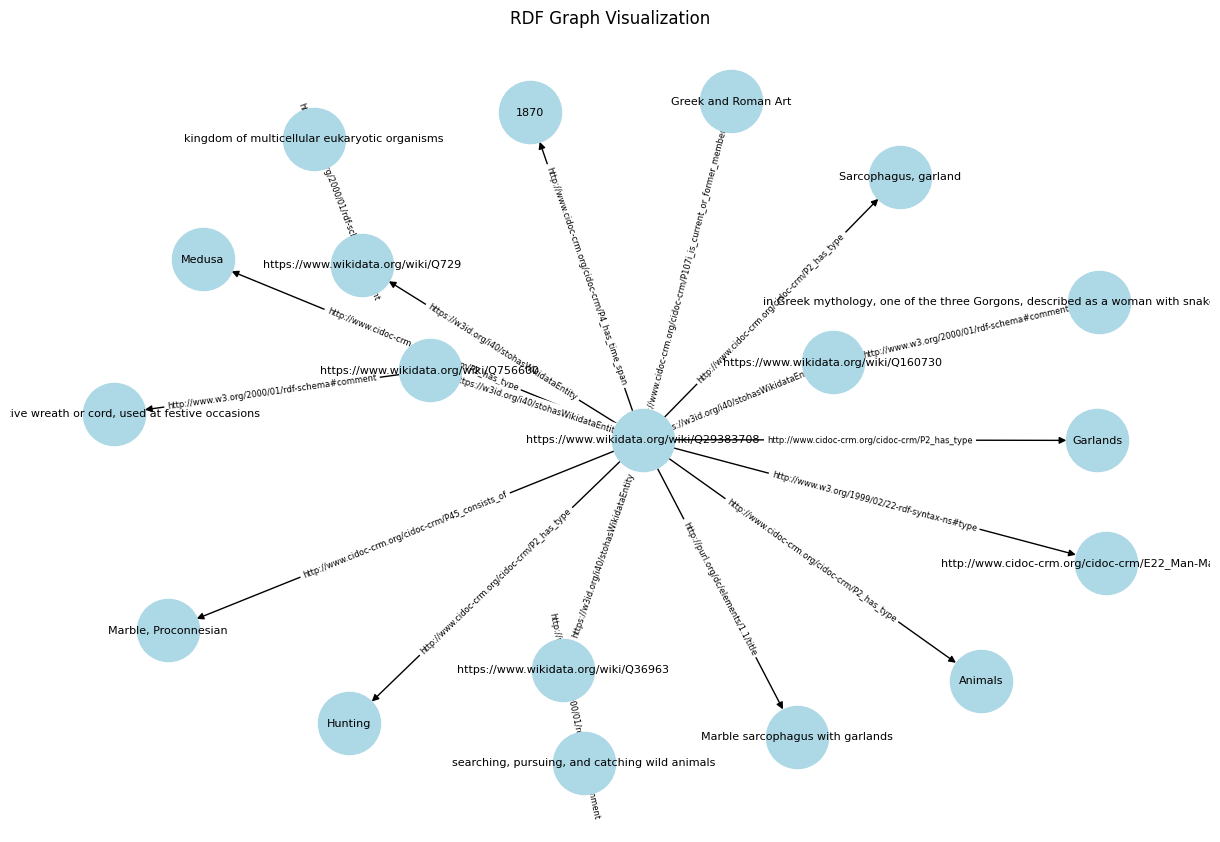

In [11]:
visualize_rdf_graph(artifact.to_rdf())

# Create special artifacts

In [12]:
roman = ArtifactRoman.from_dataframe(df, 0)

In [13]:
roman.print_rdf()

@prefix crm: <http://www.cidoc-crm.org/cidoc-crm/> .
@prefix dc: <http://purl.org/dc/elements/1.1/> .
@prefix w3: <https://w3id.org/i40/sto> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<https://www.wikidata.org/wiki/Q29383708> a crm:E22_Man-Made_Object ;
    dc:title "Marble sarcophagus with garlands" ;
    crm:P107i_is_current_or_former_member_of "Greek and Roman Art" ;
    crm:P2_has_type "Animals",
        "Garlands",
        "Hunting",
        "Medusa",
        "Roman Empire",
        "Sarcophagus, garland" ;
    crm:P45_consists_of "Marble, Proconnesian" ;
    crm:P4_has_time_span "1870"^^xsd:gYear ;
    w3:hasWikidataEntity <https://www.wikidata.org/wiki/Q160730>,
        <https://www.wikidata.org/wiki/Q2277>,
        <https://www.wikidata.org/wiki/Q36963>,
        <https://www.wikidata.org/wiki/Q729>,
        <https://www.wikidata.org/wiki/Q756600> .




In [14]:
greek = ArtifactGreek.from_dataframe(df, 1)